In [1]:
import networkx as nx

# Load the edge list into a NetworkX graph
G = nx.read_edgelist('facebook_combined.txt')

# Now you can analyze the graph, for example by finding the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f'The graph has {num_nodes} nodes and {num_edges} edges.')

The graph has 4039 nodes and 88234 edges.


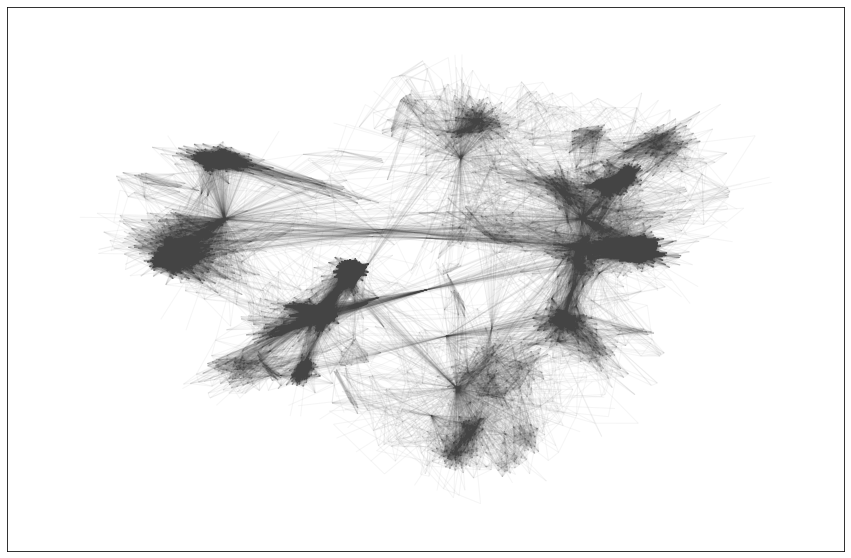

In [3]:
import matplotlib.pyplot as plt
# Plot the graph
pos = nx.spring_layout(G, k=0.1)
plt.figure(figsize=(15, 10))
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edge_color="#444444",
    alpha=0.05,
    with_labels=False)

In [4]:
# Load data from facebook/0.egofeat
ego_features = []
with open('facebook/0.egofeat') as f:
    for line in f:
        ego_features = [int(x) for x in line.split()]

In [6]:
len(ego_features)

224

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# Example data
data = np.array([[1.0, 2.0], [1.5, 1.8], [5.0, 8.0], [8.0, 8.0],
                 [1.0, 0.6], [9.0, 11.0], [8.0, 2.0], [10.0, 2.0],
                 [9.0, 3.0]])

# Number of clusters
k = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(data)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Display results
centroids, labels



(array([[1.16666667, 1.46666667],
        [9.        , 2.33333333],
        [7.33333333, 9.        ]]),
 array([0, 0, 2, 2, 0, 2, 1, 1, 1], dtype=int32))

Text(0, 0.5, 'Y Coordinate')

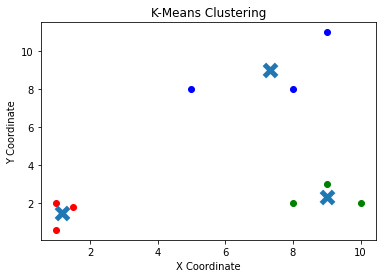

In [8]:
import matplotlib.pyplot as plt

# Assuming 'data', 'labels', and 'centroids' are already defined as per your KMeans result

# Scatter plot for each data point, colored by its cluster label
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], c=('red', 'green', 'blue')[labels[i]], marker='o')

# Scatter plot for centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=5, zorder=10)

# Add title and labels as needed
plt.title('K-Means Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

[[ 1.   2. ]
 [ 1.5  1.8]
 [ 5.   8. ]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]
 [ 8.   2. ]
 [10.   2. ]
 [ 9.   3. ]]


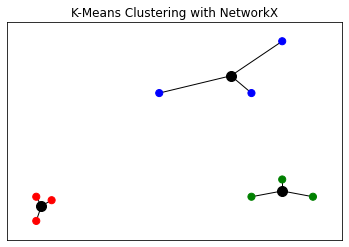

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'data', 'labels', and 'centroids' are already defined as per your KMeans result

# Create a graph
G = nx.Graph()

# Add nodes with data point indices
for i in range(len(data)):
    G.add_node(i, pos=(data[i][0], data[i][1]), label=labels[i])
print(data)
# Add centroid nodes
centroid_indices = range(len(data), len(data) + len(centroids))
for i, c in zip(centroid_indices, centroids):
    G.add_node(i, pos=(c[0], c[1]), label='centroid')

# Add edges from each data point to its respective centroid
for i in range(len(data)):
    G.add_edge(i, labels[i] + len(data))

# Position of each node
pos = nx.get_node_attributes(G, 'pos')

# Draw the nodes - color by label
colors = ['red', 'green', 'blue', 'yellow', 'purple'] # Adjust based on number of clusters
node_colors = [colors[data['label']] for i, data in G.nodes(data=True) if data['label'] != 'centroid']
nx.draw_networkx_nodes(G, pos, nodelist=range(len(data)), node_color=node_colors, node_size=50)

# Draw centroid nodes
nx.draw_networkx_nodes(G, pos, nodelist=centroid_indices, node_color='black', node_size=100)

# Draw edges
nx.draw_networkx_edges(G, pos)

# Show the plot
plt.title('K-Means Clustering with NetworkX')
plt.show()

